In [3]:
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('Outputs/packets-2021.09.20-processed')

In [16]:
df['flow'] = df['srcip'] + ':' + df.srcport.map(str) + '->' + df['dstip'] + ':' + df.dstport.map(str)
# Read a specific location (R,C)
print(df.iloc[5,10])

127.0.0.1:8088->127.0.0.1:13554


In [319]:
df = df.sort_values('payload_size')
is_port_8088 = df['dstport']==8088
print(is_port_8088.head())
df = df[is_port_8088]

0        True
2206     True
2207    False
2208     True
2209    False
Name: dstport, dtype: bool


In [320]:
is_64_bytes = df['payload_size']==64
print(is_64_bytes.head())
df = df[is_64_bytes]

0       True
2206    True
2208    True
2210    True
2212    True
Name: payload_size, dtype: bool


In [321]:
pd.set_option("display.max.columns", None)
df = df.sort_values("payload_size")
df.head()

,id,proto,srcip,dstip,srcport,dstport,payload_size,shannon,bien,tbien
0,_IcrBHwBUTNUf9WXZnqQ,tcp,127.0.0.1,127.0.0.1,8425,8088,128,0.390219,0.606107,0.974764
24,GIcrBHwBUTNUf9WXaHxP,tcp,127.0.0.1,127.0.0.1,8425,8088,128,0.383035,0.732011,0.964330
10,EIcrBHwBUTNUf9WXZnuQ,tcp,127.0.0.1,127.0.0.1,8425,8088,128,0.393445,0.528901,0.971131
8,DIcrBHwBUTNUf9WXZnuQ,tcp,127.0.0.1,127.0.0.1,8425,8088,128,0.377562,0.644742,0.974158
6,CIcrBHwBUTNUf9WXZnuQ,tcp,127.0.0.1,127.0.0.1,8425,8088,128,0.375977,0.565523,0.971905


<AxesSubplot:title={'center':'128 bytes chunks of the RFC 761 in plaintext'}, ylabel='Density'>

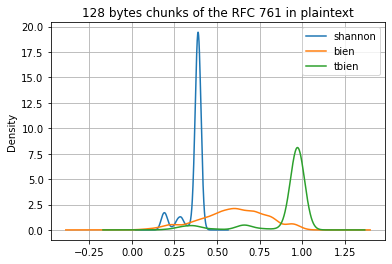

In [323]:
df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='density',title='64 bytes chunks of the RFC 761 in plaintext', grid=True)


In [324]:
#df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='line',title='')

In [325]:
# df.to_csv('Outputs/FixedSizeCSVs/32bytesNeilDeGrasse.csv',',')